In [1]:
#Import Dependencies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

pd.options.mode.chained_assignment = None

In [2]:
#Load in the data
data = './Resources/Pokemon.csv'

df = pd.read_csv(data)

df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [3]:
#Look at df shape
df.shape

(800, 13)

In [4]:
#Check dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [5]:
#Check column Names

columns = df.columns

columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [6]:
#Format column names

#Create a copy of the df
df2 = df.copy()

#Assign new column name
df2['Num'] = df['#']

#Replace spaces with Underscores 
rename = columns[[2, 3, 8, 9]]
for col in rename:
    if '.' in col:
        cola = col.replace('. ', '_')
    else:
        cola = col.replace(' ', '_')
    df2[cola] = df[col]

#Drop Duplicate columns    
df2 = df2.drop(columns = columns[[0, 2, 3, 8, 9]])

#Reorder columns
mon_df = df2[[
    'Num', 'Name', 'Type_1', 'Type_2',
    'Total', 'HP', 'Attack', 'Defense',
    'Sp_Atk', 'Sp_Def', 'Speed', 'Generation',
    'Legendary' 
    ]]

#View updated column names
mon_df.columns

Index(['Num', 'Name', 'Type_1', 'Type_2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp_Atk', 'Sp_Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [7]:
#Check df Stats
mon_df.describe()

,Num,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [8]:
#Create variable for Pokemon Stats
mon_stats = mon_df.columns[5:-2]

mon_stats

Index(['HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed'], dtype='object')

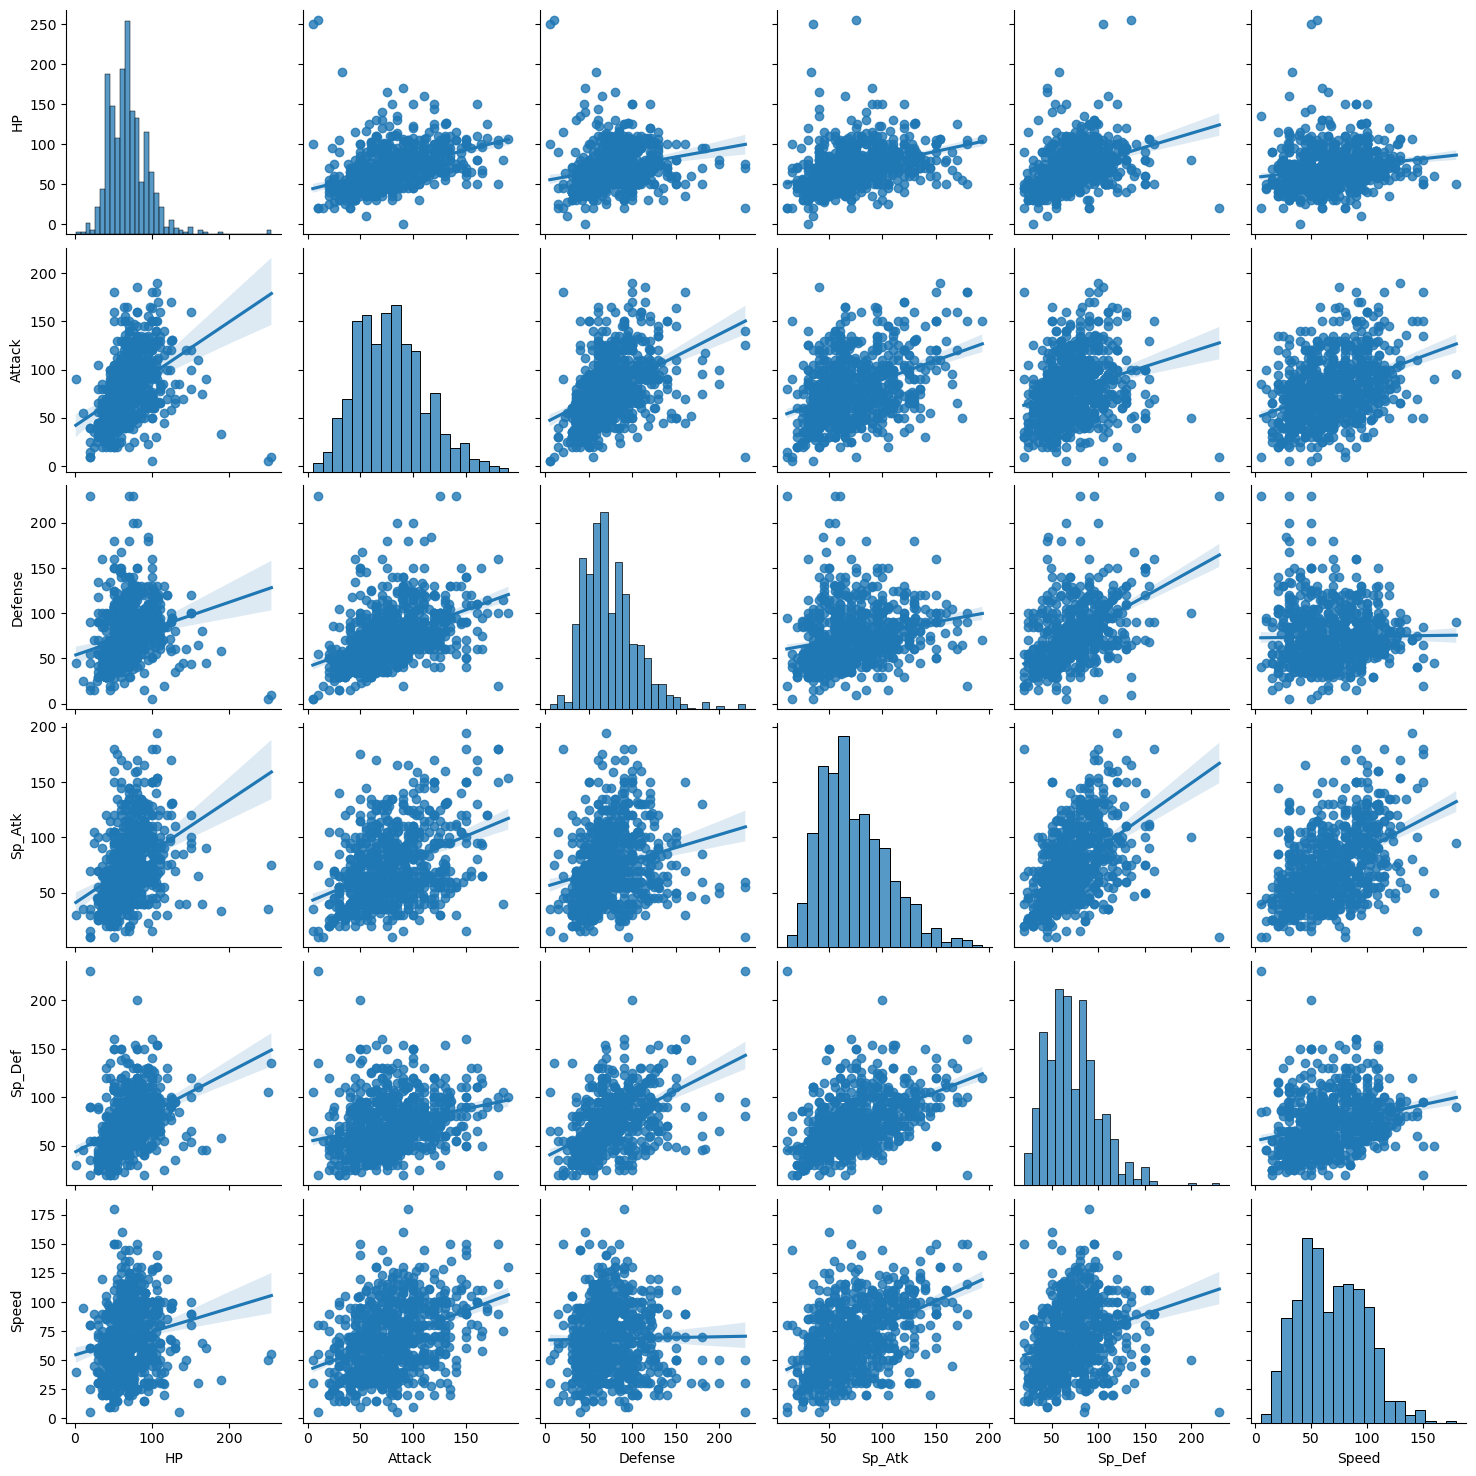

In [9]:
#Visualize the Pokemon stats
fig_1 = sns.pairplot(data = mon_df.iloc[:, 5:-2], kind = 'reg')

fig_1

In [10]:
#Save fig_1
fig_1.savefig('./Results/Pokemon_Stats.png')

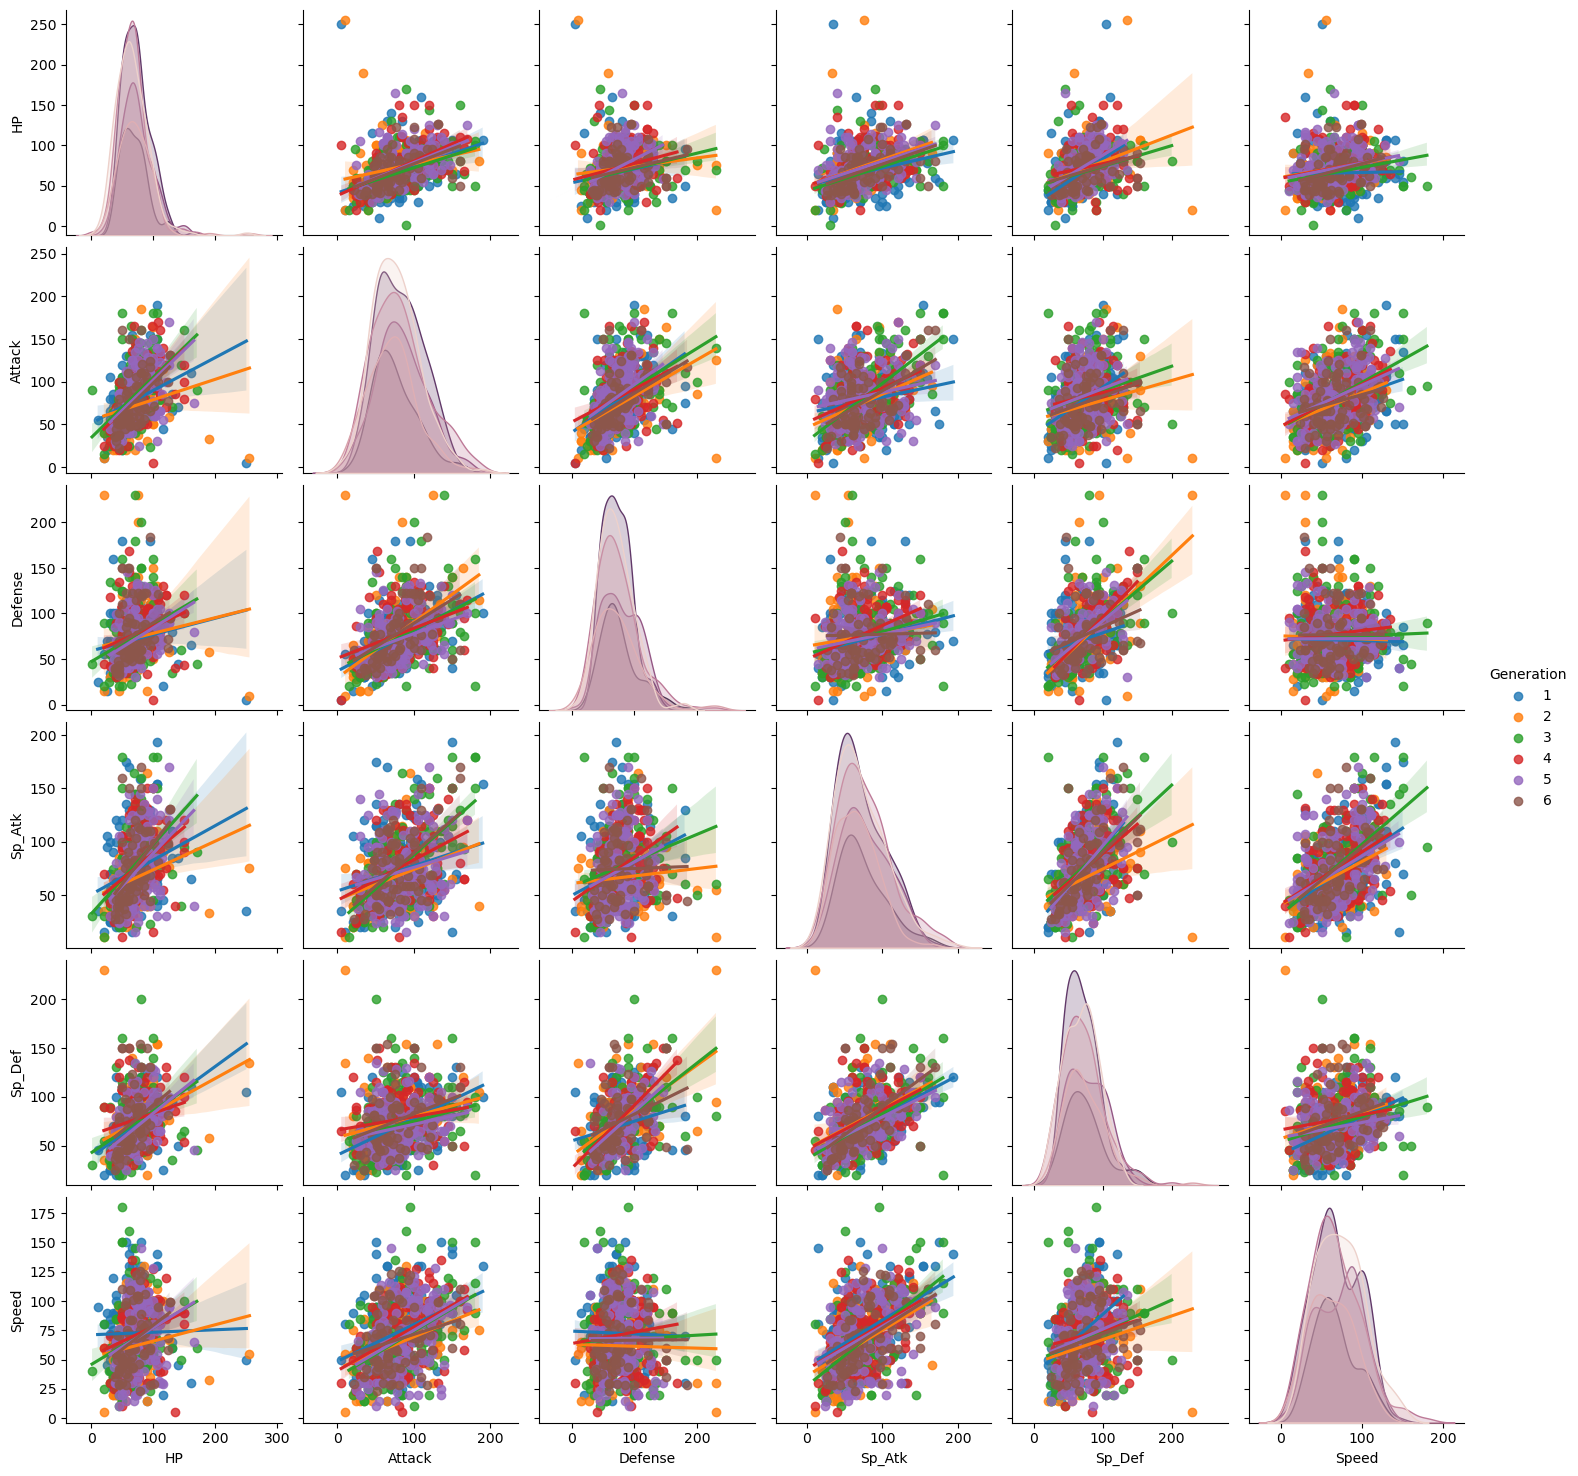

In [11]:
#Visualize the Pokemon stats by Generation
fig_2 = sns.pairplot(data = mon_df.iloc[:, 5:-1], diag_kind = 'kde', kind = 'reg', plot_kws = dict(truncate = True), vars = mon_df.iloc[:, 5:-2], hue = 'Generation')

plt.show()

In [12]:
#Save fig_2
fig_2.savefig('./Results/Pokemon_Stats_By_Gen.png')

In [13]:
#Check Pokemon Types 
for category in ['Type_1', 'Type_2', 'Generation', 'Legendary']:
    print('"{}" has {} missing values. The rest are:'.format(category, mon_df[category].isnull().sum()))
    
    mon_types = mon_df.groupby(category).count()['Num']
    
    print(mon_types, end = '\n\n')

"Type_1" has 0 missing values. The rest are:
Type_1
Bug          69
Dark         31
Dragon       32
Electric     44
Fairy        17
Fighting     27
Fire         52
Flying        4
Ghost        32
Grass        70
Ground       32
Ice          24
Normal       98
Poison       28
Psychic      57
Rock         44
Steel        27
Water       112
Name: Num, dtype: int64

"Type_2" has 386 missing values. The rest are:
Type_2
Bug          3
Dark        20
Dragon      18
Electric     6
Fairy       23
Fighting    26
Fire        12
Flying      97
Ghost       14
Grass       25
Ground      35
Ice         14
Normal       4
Poison      34
Psychic     33
Rock        14
Steel       22
Water       14
Name: Num, dtype: int64

"Generation" has 0 missing values. The rest are:
Generation
1    166
2    106
3    160
4    121
5    165
6     82
Name: Num, dtype: int64

"Legendary" has 0 missing values. The rest are:
Legendary
False    735
True      65
Name: Num, dtype: int64



C:\Users\owner\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\owner\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\owner\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

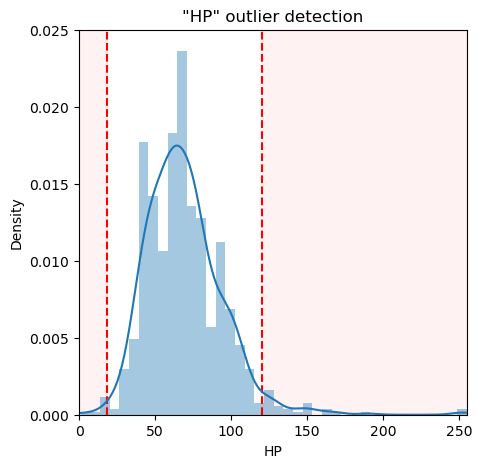

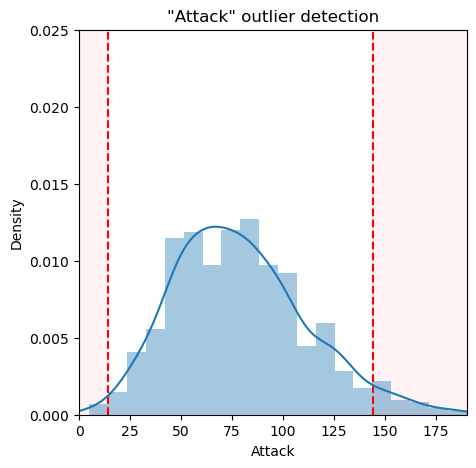

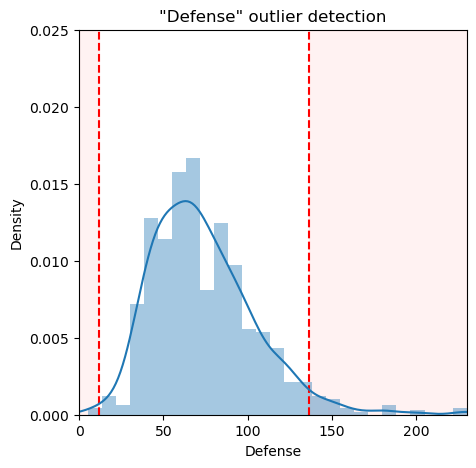

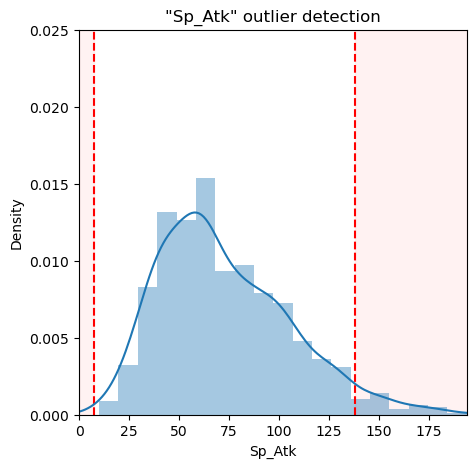

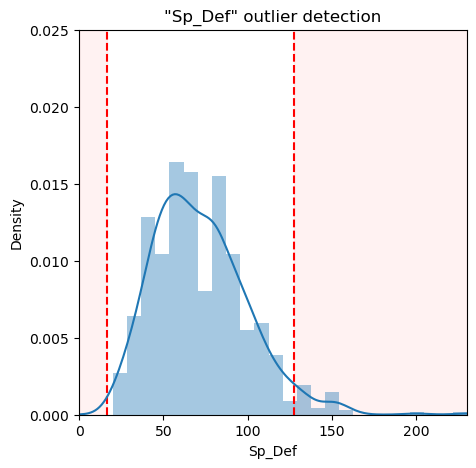

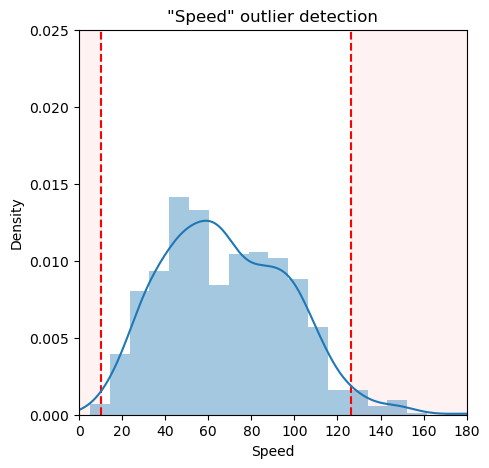

In [14]:
#Clean Outliers in df

#Create Outlier Function
def check_out(data):
    
    #Make variable for Max, mean, and standard dev
    M = max(data)
    m = np.mean(data)
    s = np.std(data)
    
    #Create Low and High filters
    L = m - 2 * s
    H = m + 2 * s
    
    #Plot it
    f, ax = plt.subplots()
    f.set_figheight(5)
    f.set_figwidth(5)
    ax.set_ylim([0, 0.025])
    ax.set_xlim([0, M])
    ax.set_title('"{}" outlier detection'.format(data.name))
    
    #PLot verticle line for upper limit
    ax.vlines(H, 0, 0.025, color = 'red', linestyle = 'dashed')
    ax.fill_between(x = [H,M], y1 = 0.025, color = 'red', alpha = .05)
    
    #Plot verticle line for lower limit
    ax.vlines(L, 0, 0.025, color = 'red', linestyle = 'dashed')
    ax.fill_between(x = [0,L], y1 = 0.025, color = 'red', alpha = .05)
    
    #Plot the distribution
    sns.distplot(data, ax = ax)
    
    #Return outliers
    return data[(data < L) | (data > H)].index

#Call the function
mon_df['Outlier'] = np.zeros((len(mon_df),1))
for var in mon_stats:
            pd.options.mode.chained_assignment = None
            mon_df.loc[check_out(mon_df[var]),'Outlier'] = 1
    
plt.show()

In [23]:
#Check how many Pokemon are considered outliers
mon_out = len(mon_df.loc[mon_df.Outlier == 1, :])

#Create an Outlier percentage variable
out_per = mon_out / mon_df.shape[0] * 100 

#Print findings
print('There are {} outliers, which means {}% of Pokemon are considered outliers.'.format(mon_out, out_per))

There are 133 outliers, which means 16.625% of Pokemon are considered outliers.


In [24]:
#Check legendary pokemon for possible outlier stats

#Create legendary pokemon variable
legend= len(mon_df[mon_df.Legendary == True])

#Create Legendary outlier stat variable
legend_out = len(mon_df.loc[(mon_df.Outlier == 1) & (mon_df.Legendary == True), :])

#Print findings
print('There are {} legendary Pokémon, out of those {} have outlier stats.'.format(legendary, legendary_outliers))

There are 65 legendary Pokémon, out of those 42 have outlier stats.


In [28]:
#Check Mega pokemon for possible outlier stats

#Create Mega outlier stat variable
mega_outliers = len([pokemon for pokemon in mon_df.loc[(mon_df.Outlier == 1) & (mon_df.Legendary == False), 'Name'] 
                 if 'Mega' in pokemon])                     
#Print findings
print('There are {} Mega Pokemon that are considered outliers'.format(mega_outliers))

There are 29 Mega Pokemon that are considered outliers
